## Seguimiento 1: Análisis Comparativo de Algoritmos de Ordenamiento

Este notebook implementa y compara 11 algoritmos de ordenamiento aplicados a campos bibliográficos extraídos de archivos BibTeX.

### Objetivos:
1. Extraer campos de archivo BibTeX consolidado
2. Implementar 11 algoritmos de ordenamiento
3. Medir tiempos de ejecución por algoritmo y campo
4. Comparar rendimiento con tablas y gráficas
5. Analizar autores más frecuentes

### Flujo del Proceso:
```
Extracción BibTeX → Implementación de Algoritmos → 
Aplicación por Campo → Medición de Tiempos → 
Exportación de Resultados → Visualización → Análisis de Autores
```

### Algoritmos Implementados:

#### Algoritmos Eficientes (O(n log n)):
1. **TimSort**: Algoritmo híbrido (Merge + Insertion), usado por Python
2. **Quick Sort**: Divide y conquista con pivote
3. **Heap Sort**: Basado en estructura de heap
4. **Tree Sort**: Árbol binario de búsqueda + recorrido inorden
5. **Radix Sort**: Ordenamiento por dígitos/caracteres (LSD)

#### Algoritmos Intermedios:
6. **Comb Sort**: Mejora de Bubble Sort con gap decreciente
7. **Bucket Sort**: Distribución en cubetas + ordenamiento interno
8. **Pigeonhole Sort**: Distribución en casillas por hash

#### Algoritmos Básicos (O(n²)):
9. **Selection Sort**: Selección del mínimo iterativa
10. **Gnome Sort**: Similar a Insertion Sort con retroceso
11. **Binary Insertion Sort**: Insertion Sort con búsqueda binaria

### Campos Analizados:
- **author**: Autores de artículos
- **title**: Títulos de publicaciones
- **journal**: Revistas/conferencias
- **year**: Años de publicación
- **doi**: Identificadores digitales
- **keywords**: Palabras clave
- **abstract**: Resúmenes

### Métricas Evaluadas:
- **Tiempo de ejecución** (segundos)
- **Tamaño del dataset** (número de elementos)
- **Rendimiento relativo** por algoritmo

### Salidas Generadas:
```
ordenamiento/
├── author.txt          # Resultados ordenados por autor
├── title.txt           # Resultados ordenados por título
├── journal.txt         # Resultados ordenados por revista
├── year.txt            # Resultados ordenados por año
├── doi.txt             # Resultados ordenados por DOI
├── keywords.txt        # Resultados ordenados por keywords
└── abstract.txt        # Resultados ordenados por abstract

tiempos/
├── tiempo-ordenamiento.txt    # CSV con tiempos
├── tabla_resultados.csv       # Tabla completa
├── tabla_resultados.md        # Tabla en Markdown
├── tiempo_author.png          # Gráfica de tiempos
├── tiempo_title.png
└── ...
```

### Variables de Entorno:
```python
CONSOLIDADO_PATH    # Ruta del archivo BibTeX consolidado
ORDENAMIENTO_PATH   # Carpeta de salida para resultados
TIEMPOS_PATH        # Carpeta de salida para métricas
```

### Tecnologías Utilizadas:
- **Python**: Lenguaje base
- **NumPy**: Operaciones numéricas
- **Pandas**: Tablas de resultados
- **Matplotlib**: Visualizaciones
- **heapq**: Implementación de Heap Sort
- **bisect**: Búsqueda binaria
- **re**: Expresiones regulares para parsing

### Implementación Completa: Extracción, Algoritmos y Análisis

Esta celda contiene todo el código del análisis de ordenamiento.

## Parte 1: Configuración y Extracción

### Importaciones y Variables de Entorno:

```python
import os, re, time, random, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd, heapq
from functools import cmp_to_key
from collections import defaultdict
import math, bisect
from dotenv import load_dotenv
```

### Función de Extracción BibTeX:

```python
def extract_bibtex_fields(file_path):
    """
    Extrae 7 campos clave de un archivo BibTeX.
    """
    fields = {
        'author': [], 'title': [], 'journal': [],
        'year': [], 'doi': [], 'keywords': [], 'abstract': []
    }
```

#### Proceso de Extracción:

**1. Leer archivo completo**:
```python
with open(file_path, 'r', encoding='utf-8') as f:
    content = f.read()
```

**2. Encontrar entradas BibTeX**:
```python
entries = re.findall(r'@\w+\s*\{[^@]*\}', content, re.DOTALL)
```
Regex: `@\w+\s*\{[^@]*\}` captura desde `@article{` hasta el `}` de cierre

**3. Extraer campos con regex**:
```python
pattern = rf'{field}\s*=\s*[\{{\"](.*?)[\}}\"]'
match = re.search(pattern, entry, re.IGNORECASE | re.DOTALL)
```

**4. Manejo especial de journal**:
```python
# Si no hay journal, buscar booktitle (para conferencias)
if field == 'journal' and not match:
    pattern = r'booktitle\s*=\s*[\{{\"](.*?)[\}}\"]'
    match = re.search(pattern, entry, re.IGNORECASE | re.DOTALL)
```

## Parte 2: Implementación de Algoritmos

### 1. TimSort (Python's Built-in)

```python
def timsort(arr):
    return sorted(arr)
```

**Características**:
- Algoritmo híbrido: Merge Sort + Insertion Sort
- Usado por Python y Java
- Complejidad: O(n log n)
- Estable: Mantiene orden relativo
- Optimizado para datos parcialmente ordenados

### 2. Comb Sort

```python
def combsort(arr):
    gap = n
    shrink = 1.3  # Factor de reducción
    while not sorted_flag:
        gap = int(gap / shrink)
        # Comparar elementos separados por gap
```

**Características**:
- Mejora de Bubble Sort
- Complejidad: O(n²/2^p)
- Gap inicial: tamaño del array
- Factor de reducción: 1.3 (óptimo empíricamente)

### 3. Selection Sort

```python
def selectionsort(arr):
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
```

**Características**:
- Complejidad: O(n²)
- No estable
- Mínimo número de intercambios: O(n)

### 4. Tree Sort

```python
class Nodo:
    def __init__(self, clave):
        self.clave = clave
        self.izq = None
        self.der = None

def treesort(arr):
    # Construir BST
    for item in set(arr):
        raiz = insertar(raiz, clave)
    # Recorrido inorden
    inorden(raiz, resultado)
```

**Características**:
- Basado en Árbol Binario de Búsqueda (BST)
- Complejidad: O(n log n) promedio, O(n²) peor caso
- Recorrido inorden produce lista ordenada

### 5. Pigeonhole Sort

```python
def pigeonholesort(arr):
    # Mapear strings a números con hash
    str_to_num = {s: hash(s) % 1000000 for s in arr}
    # Crear casillas
    holes = [[] for _ in range(size)]
    # Distribuir y recolectar
```

**Características**:
- Complejidad: O(n + Range)
- Eficiente cuando Range ≈ n
- Adaptación para strings: Usa hash

### 6. Bucket Sort

```python
def bucketsort(arr):
    buckets = defaultdict(list)
    # Distribuir por primera letra
    for s in arr:
        key = s[0].lower() if s != "" else ""
        buckets[key].append(s)
    # Ordenar cada bucket
```

**Características**:
- Complejidad: O(n + k) donde k es número de buckets
- Eficiente para distribución uniforme

### 7. Quick Sort

```python
def quicksort(arr):
    def partition(arr, low, high):
        pivot = arr[high]
        # Particionar alrededor del pivote
    _quicksort(arr, 0, len(arr) - 1)
```

**Características**:
- Complejidad: O(n log n) promedio, O(n²) peor caso
- Divide y conquista
- In-place

### 8. Heap Sort

```python
def heapsort(arr):
    heap = arr.copy()
    heapq.heapify(heap)  # Convertir a min-heap
    result = []
    while heap:
        result.append(heapq.heappop(heap))
```

**Características**:
- Complejidad: O(n log n)
- Usa estructura de heap (montículo)

### 9. Gnome Sort

```python
def gnomesort(arr):
    pos = 0
    while pos < n:
        if pos == 0 or arr[pos] >= arr[pos - 1]:
            pos += 1
        else:
            arr[pos], arr[pos - 1] = arr[pos - 1], arr[pos]
            pos -= 1
```

**Características**:
- Complejidad: O(n²)
- Similar a Insertion Sort
- Retrocede cuando encuentra desorden

### 10. Binary Insertion Sort

```python
def binaryInsertionsort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        # Búsqueda binaria para encontrar posición
        lo, hi = 0, i
        while lo < hi:
            mid = (lo + hi) // 2
            if arr[mid] <= key:
                lo = mid + 1
```

**Características**:
- Complejidad: O(n²) pero menos comparaciones
- Usa búsqueda binaria para encontrar posición

### 11. Radix Sort (LSD)

```python
def radixsort(arr):
    max_len = max(len(s) for s in arr)
    # Procesar desde el último carácter (LSD)
    for pos in range(max_len - 1, -1, -1):
        # Distribuir en buckets por carácter
```

**Características**:
- Complejidad: O(d × n) donde d es número de caracteres
- LSD: Least Significant Digit
- Estable

## Parte 3: Ejecución y Medición

### Aplicar Algoritmos a Cada Campo:

```python
for field, values in fields.items():
    for algo_name, algo_func in algorithms.items():
        start_time = time.time()
        sorted_list = algo_func(values_to_sort)
        end_time = time.time()
        elapsed = (end_time - start_time)
```

**Proceso**:
1. Copiar datos para no modificar original
2. Medir tiempo con `time.time()`
3. Ejecutar algoritmo
4. Guardar resultados y tiempos
5. Capturar errores sin interrumpir

## Parte 4: Exportación de Resultados

### Archivos de Resultados Ordenados:

```python
for field, algo_results in sorted_results.items():
    with open(file_path, 'w', encoding='utf-8') as f:
        for algo_name in algorithms.keys():
            f.write(f"# ordenamiento por {algo_name}\n")
            for item in algo_results[algo_name]:
                f.write(item + "\n")
```




📊 Resultados de ejecución:

   Campo           Algoritmo  Tamaño  Tiempo (s)
  author             timsort      50    0.000012
  author            combsort      50    0.000051
  author       selectionsort      50    0.000071
  author            treesort      50    0.000073
  author      pigeonholesort      50    0.823550
  author          bucketsort      50    0.000078
  author           quicksort      50    0.000046
  author            heapsort      50    0.000027
  author           gnomesort      50    0.000136
  author binaryInsertionsort      50    0.000033
  author           radixsort      50    0.003562
   title             timsort      50    0.000011
   title            combsort      50    0.000047
   title       selectionsort      50    0.000067
   title            treesort      50    0.000075
   title      pigeonholesort      50    0.608999
   title          bucketsort      50    0.000065
   title           quicksort      50    0.000038
   title            heapsort      50    

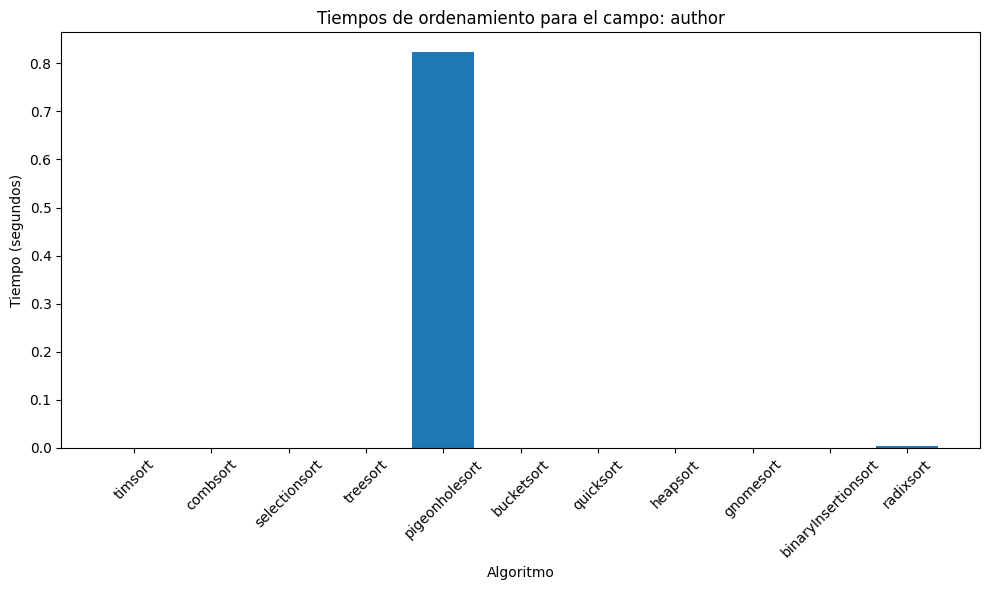

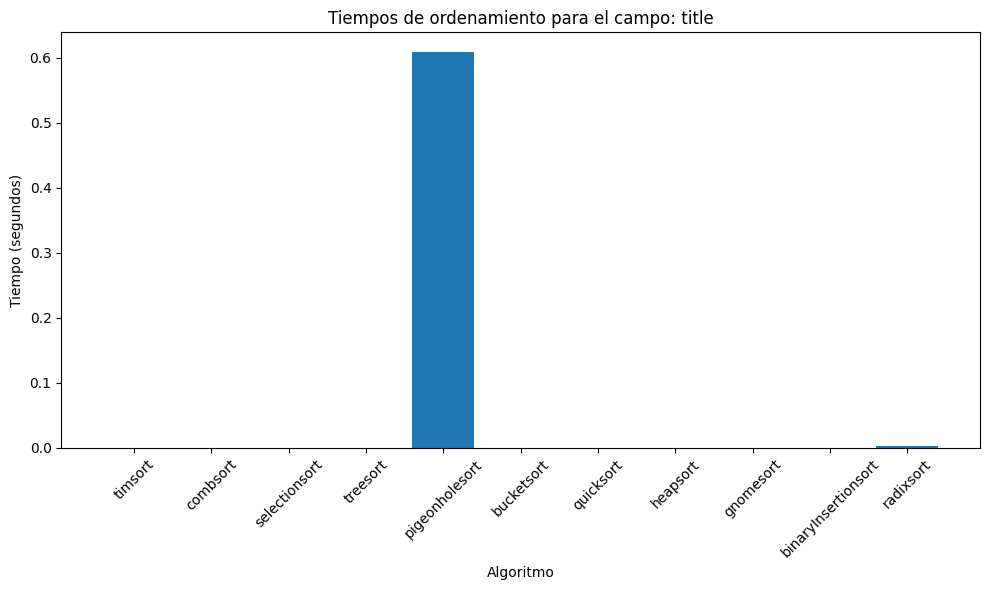

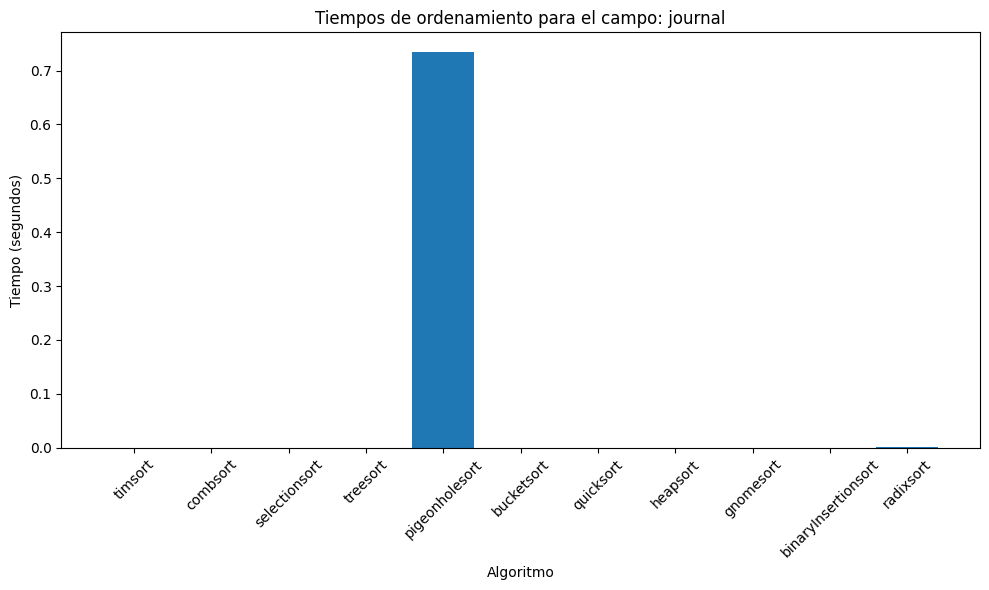

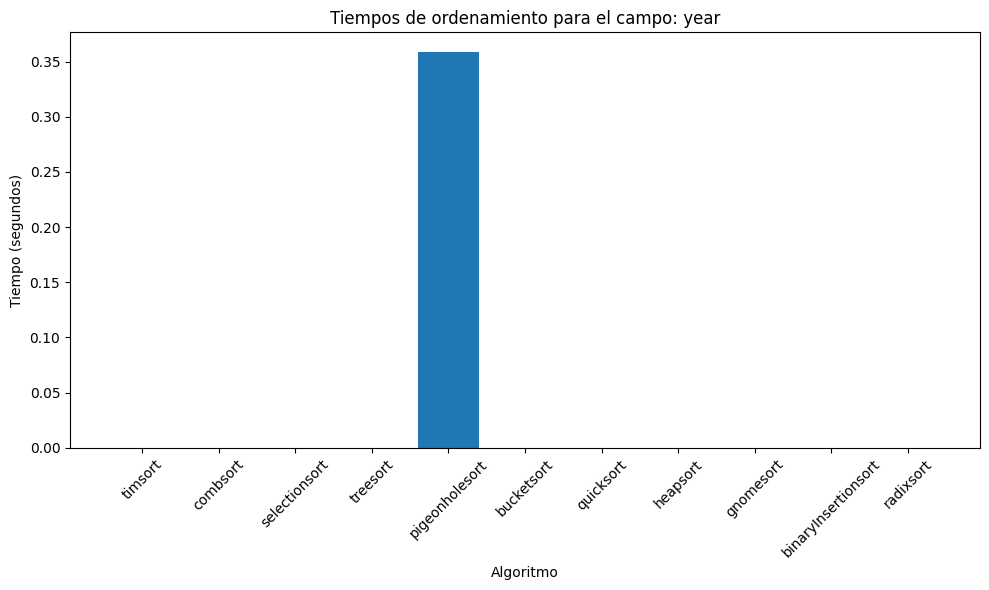

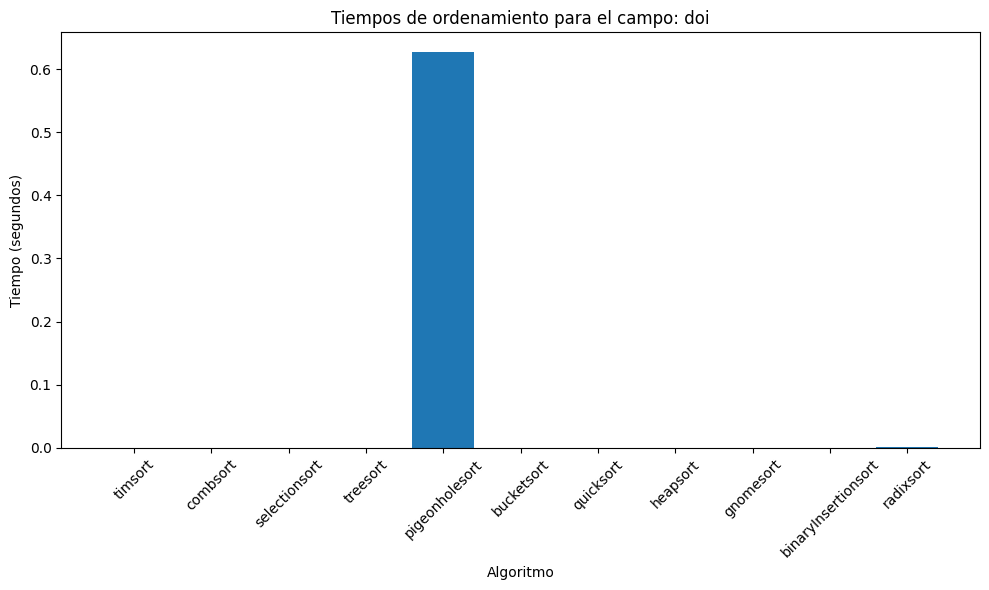

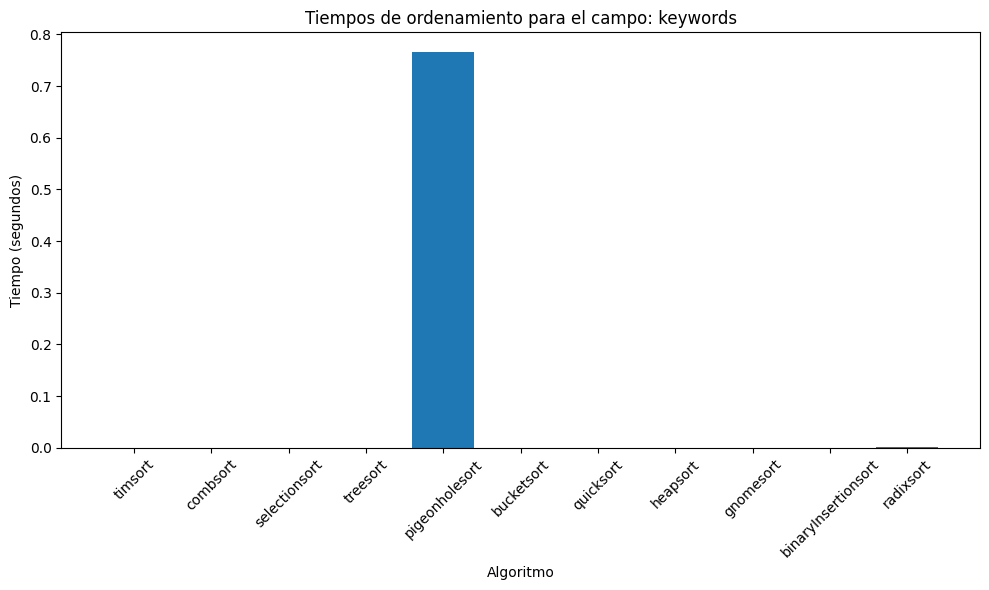

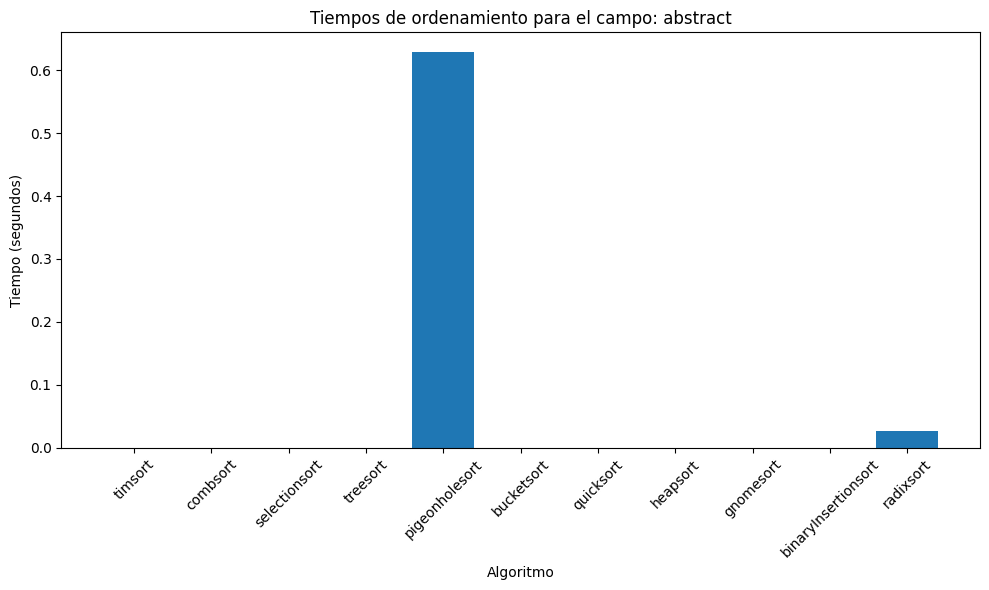

In [2]:
import os
import re
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import heapq
from functools import cmp_to_key
from collections import defaultdict
import math
import bisect

from dotenv import load_dotenv

# Cargar variables de entorno desde .env
load_dotenv()

# Definir rutas
BIBTEX_PATH =os.getenv("CONSOLIDADO_PATH")
OUTPUT_PATH = os.getenv("ORDENAMIENTO_PATH")
TIMING_PATH = os.getenv("TIEMPOS_PATH")

# Crear directorios si no existen
Path(OUTPUT_PATH).mkdir(parents=True, exist_ok=True)
Path(TIMING_PATH).mkdir(parents=True, exist_ok=True)

# %%
def extract_bibtex_fields(file_path):
    """
    Extrae los campos de un archivo BibTeX.
    Se buscan las claves: author, title, journal, year, doi, keywords y abstract.
    Para journal se considera también booktitle.
    Si un campo no existe se asigna como cadena vacía.
    """
    fields = {
        'author': [],
        'title': [],
        'journal': [],
        'year': [],
        'doi': [],
        'keywords': [],
        'abstract': []
    }
    
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
        
        # Buscar entradas BibTeX (cualquier tipo: article, inproceedings, etc.)
        entries = re.findall(r'@\w+\s*\{[^@]*\}', content, re.DOTALL)
        
        for entry in entries:
            for field in fields.keys():
                # Buscar el campo en la entrada, manejando {valor} o "valor"
                pattern = rf'{field}\s*=\s*[\{{\"](.*?)[\}}\"]'
                match = re.search(pattern, entry, re.IGNORECASE | re.DOTALL)
                
                # Para journal, buscar booktitle si no se encontró journal
                if field == 'journal' and not match:
                    pattern = r'booktitle\s*=\s*[\{{\"](.*?)[\}}\"]'
                    match = re.search(pattern, entry, re.IGNORECASE | re.DOTALL)
                
                if match:
                    value = match.group(1).strip()
                    fields[field].append(value)
                else:
                    fields[field].append("")
        
        return fields
        
    except Exception as e:
        print(f"Error al procesar el archivo BibTeX: {e}")
        return fields

# %%
# Implementación de Algoritmos de Ordenamiento

# 1. TimSort (usando sorted de Python, que es TimSort)
def timsort(arr):
    return sorted(arr)

# 2. Comb Sort
def combsort(arr):
    arr = arr.copy()
    n = len(arr)
    gap = n
    shrink = 1.3
    sorted_flag = False
    
    while not sorted_flag:
        gap = int(gap / shrink)
        if gap <= 1:
            gap = 1
            sorted_flag = True
        
        i = 0
        while i + gap < n:
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                sorted_flag = False
            i += 1
    
    return arr

# 3. Selection Sort
def selectionsort(arr):
    arr = arr.copy()
    n = len(arr)
    
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    
    return arr

# 4. Tree Sort (con eliminación de duplicados antes de insertar)
class Nodo:
    def __init__(self, clave):
        self.clave = clave
        self.izq = None
        self.der = None

def insertar(raiz, clave):
    if raiz is None:
        return Nodo(clave)
    if clave < raiz.clave:
        raiz.izq = insertar(raiz.izq, clave)
    else:
        raiz.der = insertar(raiz.der, clave)
    return raiz

def inorden(raiz, resultado):
    if raiz is not None:
        inorden(raiz.izq, resultado)
        resultado.append(raiz.clave)
        inorden(raiz.der, resultado)

def treesort(arr):
    if not arr:
        return []
    raiz = None
    # 🔑 usamos set() para eliminar duplicados ANTES de insertar
    for item in set(arr):
        clave = str(item).strip().lower()
        raiz = insertar(raiz, clave)
    resultado = []
    inorden(raiz, resultado)
    return resultado


# 5. Pigeonhole Sort
def pigeonholesort(arr):
    if not arr:
        return []
    
    min_val = 0
    max_val = 0
    
    str_to_num = {}
    for i, s in enumerate(arr):
        if s == "":
            val = -1  # Manejar cadenas vacías
        else:
            val = hash(s) % 1000000  # Limitar el rango
        str_to_num[s] = val
        
        if i == 0 or val < min_val:
            min_val = val
        if i == 0 or val > max_val:
            max_val = val
    
    size = max_val - min_val + 1
    holes = [[] for _ in range(size)]
    
    for s in arr:
        val = str_to_num[s]
        holes[val - min_val].append(s)
    
    result = []
    for hole in holes:
        result.extend(sorted(hole))
    
    return result

# 6. Bucket Sort
def bucketsort(arr):
    if not arr:
        return []
    
    buckets = defaultdict(list)
    
    for s in arr:
        key = s[0].lower() if s != "" else ""
        buckets[key].append(s)
    
    result = []
    for key in sorted(buckets.keys()):
        result.extend(sorted(buckets[key]))
    
    return result

# 7. Quick Sort
def quicksort(arr):
    arr = arr.copy()
    
    def _quicksort(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            _quicksort(arr, low, pi - 1)
            _quicksort(arr, pi + 1, high)
    
    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        
        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1
    
    _quicksort(arr, 0, len(arr) - 1)
    return arr

# 8. Heap Sort
def heapsort(arr):
    heap = arr.copy()
    heapq.heapify(heap)
    result = []
    while heap:
        result.append(heapq.heappop(heap))
    return result

# 9. Gnome Sort
def gnomesort(arr):
    arr = arr.copy()
    n = len(arr)
    pos = 0
    
    while pos < n:
        if pos == 0 or arr[pos] >= arr[pos - 1]:
            pos += 1
        else:
            arr[pos], arr[pos - 1] = arr[pos - 1], arr[pos]
            pos -= 1
    
    return arr

# 10. Binary Insertion Sort
def binaryInsertionsort(arr):
    arr = arr.copy()
    for i in range(1, len(arr)):
        key = arr[i]
        lo, hi = 0, i
        while lo < hi:
            mid = (lo + hi) // 2
            if arr[mid] <= key:
                lo = mid + 1
            else:
                hi = mid
        arr.insert(lo, arr.pop(i))
    return arr

# 11. Radix Sort para strings (LSD)
def radixsort(arr):
    if not arr:
        return []
    # Encontrar la longitud máxima de las cadenas
    max_len = max(len(s) for s in arr)
    # Procesar desde el último carácter hasta el primero
    for pos in range(max_len - 1, -1, -1):
        buckets = {}
        for s in arr:
            # Si la cadena es muy corta, usamos "" (que se ordena antes)
            key = s[pos] if pos < len(s) else ""
            buckets.setdefault(key, []).append(s)
        sorted_keys = sorted(buckets.keys())
        arr = []
        for key in sorted_keys:
            arr.extend(buckets[key])
    return arr

# %%
# Diccionario de algoritmos a utilizar
algorithms = {
    'timsort': timsort,
    'combsort': combsort,
    'selectionsort': selectionsort,
    'treesort': treesort,
    'pigeonholesort': pigeonholesort,
    'bucketsort': bucketsort,
    'quicksort': quicksort,
    'heapsort': heapsort,
    'gnomesort': gnomesort,
    'binaryInsertionsort': binaryInsertionsort,
    'radixsort': radixsort
}

# %%
# Extraer campos del archivo BibTeX
fields = extract_bibtex_fields(BIBTEX_PATH)

# Diccionarios para almacenar resultados ordenados y tiempos
sorted_results = { key: {} for key in fields.keys() }
timings = { key: {} for key in fields.keys() }

# Para cada campo, aplicar cada algoritmo y medir el tiempo de ejecución
import random

for field, values in fields.items():
    # Saltar campos vacíos
    if not values:
        print(f"⚠️ El campo '{field}' está vacío, omitiendo...")
        continue
        
    for algo_name, algo_func in algorithms.items():
        try:
            # Hacer una copia de values para no modificar el original
            values_to_sort = values.copy()
            start_time = time.time()
            sorted_list = algo_func(values_to_sort)
            end_time = time.time()
            elapsed = (end_time - start_time)
            
            sorted_results[field][algo_name] = sorted_list
            timings[field][algo_name] = elapsed
        except Exception as e:
            print(f"⚠️ Error en {algo_name} con el campo {field}: {str(e)}")
            sorted_results[field][algo_name] = []
            timings[field][algo_name] = float("nan")

# %%
# Escribir archivos de salida para cada clave en OUTPUT_PATH
for field, algo_results in sorted_results.items():
    file_path = os.path.join(OUTPUT_PATH, f"{field}.txt")
    with open(file_path, 'w', encoding='utf-8') as f:
        for algo_name in algorithms.keys():
            f.write(f"# ordenamiento por {algo_name}\n")
            for item in algo_results[algo_name]:
                f.write(item + "\n")
            f.write("\n")

# %%
# Escribir archivo con tiempos de ordenamiento en TIMING_PATH
timing_file = os.path.join(TIMING_PATH, "tiempo-ordenamiento.txt")
with open(timing_file, 'w', encoding='utf-8') as f:
    f.write("Campo,Algoritmo,Tiempo (segundos)\n")
    for field, algo_times in timings.items():
        for algo_name, t in algo_times.items():
            f.write(f"{field},{algo_name},{t}\n")

# %% 
# Crear tabla con tamaño y tiempo de cada algoritmo por campo
resultados_tabla = []

for field, algo_times in timings.items():
    tamaño = len(fields[field])  # número de elementos de ese campo
    for algo_name, t in algo_times.items():
        resultados_tabla.append({
            "Campo": field,
            "Algoritmo": algo_name,
            "Tamaño": tamaño,
            "Tiempo (s)": round(t, 6)
        })

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados_tabla)

# Mostrar tabla en pantalla
print("\n📊 Resultados de ejecución:\n")
print(df_resultados.to_string(index=False))

# Exportar a CSV y Markdown
csv_path = os.path.join(TIMING_PATH, "tabla_resultados.csv")
md_path = os.path.join(TIMING_PATH, "tabla_resultados.md")

df_resultados.to_csv(csv_path, index=False)

with open(md_path, "w", encoding="utf-8") as f:
    f.write(df_resultados.to_markdown(index=False))

print(f"\nTablas exportadas a:\n- {csv_path}\n- {md_path}")


# %%
# Graficar tiempos de ordenamiento para cada clave
for field, algo_times in timings.items():
    algo_names = list(algo_times.keys())
    times_list = [algo_times[algo] for algo in algo_names]
    
    plt.figure(figsize=(10,6))
    plt.bar(algo_names, times_list)
    plt.xlabel('Algoritmo')
    plt.ylabel('Tiempo (segundos)')
    plt.title(f'Tiempos de ordenamiento para el campo: {field}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Guardar la gráfica en TIMING_PATH (por ejemplo, "tiempo_author.png")
    plt.savefig(os.path.join(TIMING_PATH, f"tiempo_{field}.png"))
    plt.show()

# Parte 2:Tabla de Resultados:

```python
df_resultados = pd.DataFrame(resultados_tabla)
df_resultados.to_csv(csv_path, index=False)
df_resultados.to_markdown(md_path, index=False)
```

## Parte 5: Visualización

### Gráficas de Tiempos por Campo:

```python
plt.figure(figsize=(10,6))
plt.bar(algo_names, times_list)
plt.xlabel('Algoritmo')
plt.ylabel('Tiempo (segundos)')
plt.title(f'Tiempos de ordenamiento para el campo: {field}')
plt.savefig(os.path.join(TIMING_PATH, f"tiempo_{field}.png"))
```

Resultado: 7 gráficas (una por campo) comparando los 11 algoritmos

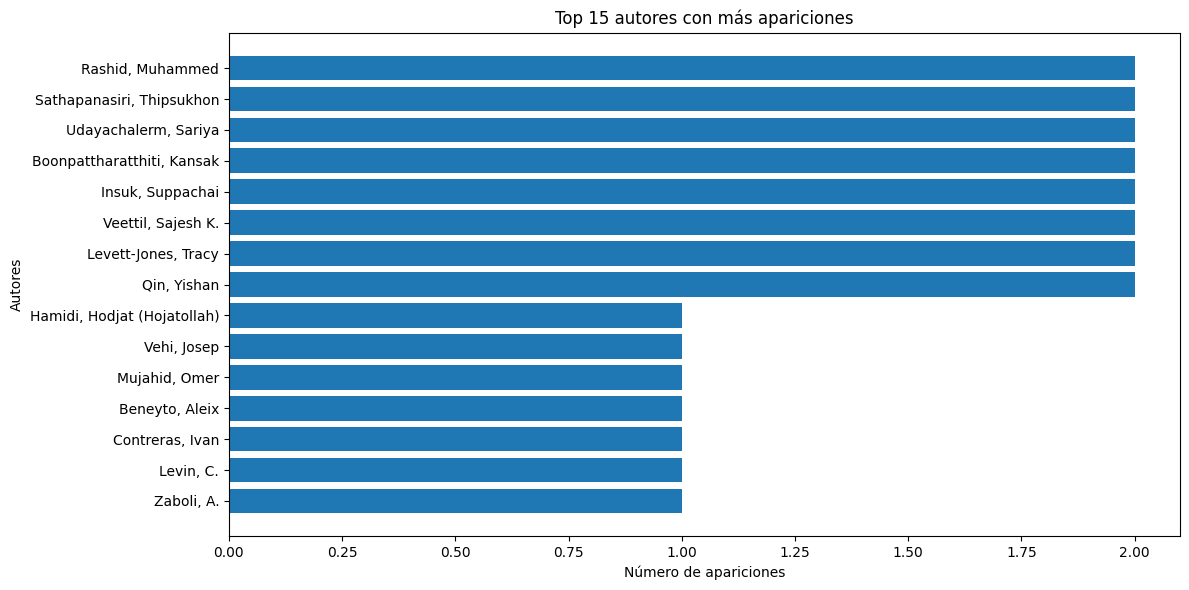

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
import re

# %% Extraer campos del archivo BibTeX
fields = extract_bibtex_fields(BIBTEX_PATH)

# Separar autores (si vienen en formato "Autor1 and Autor2")
all_authors = []
for entry in fields['author']:
    autores = re.split(r'\s+and\s+', entry, flags=re.IGNORECASE)
    all_authors.extend([a.strip() for a in autores if a.strip() != ""])

# Contar ocurrencias
contador = Counter(all_authors)
top15 = contador.most_common(15)  # ya viene ordenado de mayor a menor

# Para gráfica, invertimos para que el mayor quede arriba en barh
autores, conteos = zip(*reversed(top15))

plt.figure(figsize=(12,6))
plt.barh(autores, conteos)  # gráfica horizontal
plt.xlabel("Número de apariciones")
plt.ylabel("Autores")
plt.title("Top 15 autores con más apariciones")
plt.tight_layout()
plt.show()
